In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [13]:
df = pd.read_csv('smash_v1.csv')

# Removing type_of_shot (they're all the same)
df = df.drop('type_of_shot', axis = 1)

df.head()

id  frame_count  kpt_0_x  kpt_0_y  kpt_1_x  kpt_1_y  kpt_2_x  kpt_2_y  \
0  101            0      0.0      0.0      0.0      0.0      0.0      0.0   
1  101            1      0.0      0.0      0.0      0.0      0.0      0.0   
2  101            2      0.0      0.0      0.0      0.0      0.0      0.0   
3  101            3      0.0      0.0      0.0      0.0      0.0      0.0   
4  101            4      0.0      0.0      0.0      0.0      0.0      0.0   

      kpt_3_x     kpt_3_y  ...    kpt_12_x    kpt_12_y    kpt_13_x  \
0  687.996460  262.951782  ...  815.209229  396.171082  757.796814   
1  691.630188  274.037262  ...  815.347778  404.147430  761.215027   
2  694.214355  282.918457  ...  818.231995  417.666260  758.630005   
3  696.827820  296.562622  ...  818.831787  429.363342  752.453308   
4  700.760315  308.873901  ...  824.773682  445.019165  740.424377   

     kpt_13_y    kpt_14_x    kpt_14_y    kpt_15_x    kpt_15_y    kpt_16_x  \
0  508.305786  787.642578  469.871643  776.365906  615.642883  824.935242   
1  518.545471  791.998474  475.096252  784.513000  624.796265  835.347778   
2  530.391785  792.194336  486.224915  796.893921  634.304871  846.007263   
3  540.809692  793.435059  493.834106  799.393860  634.709961  851.539612   
4  543.479431  793.883667  498.106964  796.599182  630.698975  851.529419   

     kpt_16_y  
0  551.207275  
1  552.185242  
2  564.999878  
3  566.061462  
4  566.537598  

[5 rows x 36 columns]

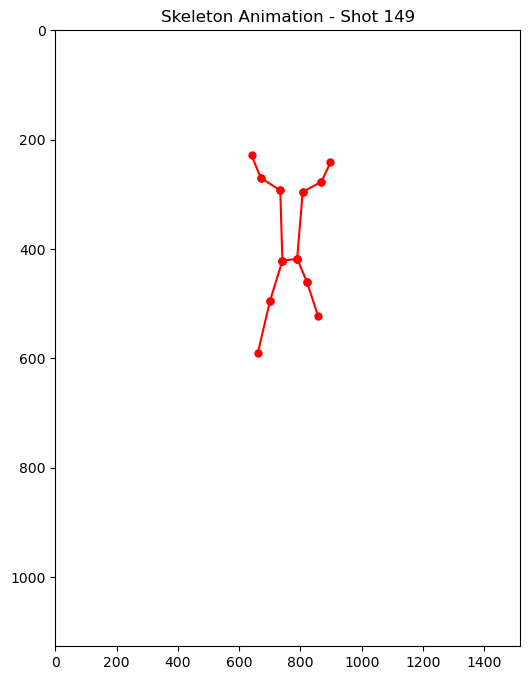

In [27]:
# Choose which shot id to visualize

shot_id = 149

shot_df = df[df['id'] == shot_id].reset_index(drop=True)

# Skeleton connections (COCO style)
skeleton = [
    (0,1),(0,2),(1,3),(2,4),
    (0,5),(0,6),(5,7),(7,9),(6,8),(8,10),
    (5,11),(6,12),(11,12),(11,13),(13,15),
    (12,14),(14,16)
]

# Set up the plot
fig, ax = plt.subplots(figsize=(6,8))
lines = []
for _ in skeleton:
    line, = ax.plot([], [], 'ro-', markersize=5)
    lines.append(line)

ax.set_xlim(0, df[[f'kpt_{i}_x' for i in range(17)]].max().max() + 50)
ax.set_ylim(0, df[[f'kpt_{i}_y' for i in range(17)]].max().max() + 50)
ax.invert_yaxis()
ax.set_title(f"Skeleton Animation - Shot {shot_id}")

# Animation function
def update(frame):
    row = shot_df.iloc[frame]
    keypoints = [(row[f'kpt_{i}_x'], row[f'kpt_{i}_y']) for i in range(17)]

    for idx, (a,b) in enumerate(skeleton):
        if keypoints[a][0] != 0 and keypoints[a][1] != 0 and keypoints[b][0] != 0 and keypoints[b][1] != 0:
            lines[idx].set_data([keypoints[a][0], keypoints[b][0]],
                                [keypoints[a][1], keypoints[b][1]])
        else:
            lines[idx].set_data([], [])
    return lines

# Create animation
anim = FuncAnimation(fig, update, frames=len(shot_df), interval=200, blit=True)

# plt.show()

# Save animation 
anim.save(f'badminton_shot_{shot_id}.gif', writer='pillow')


##### THE BELOW CELL WILL GENERATE AN ANIMATION FOR EACH SHOT IN THE DATASET BE CAREFUL OF MEMORY #####

In [ ]:
# THIS WILL GENERATE AN ANIMATION FOR EACH SHOT IN THE DATASET #

shot_id = 101

while shot_id in df['id'].values:
    
    shot_df = df[df['id'] == shot_id].reset_index(drop=True)

    # Skeleton connections (COCO style)
    skeleton = [
        (0,1),(0,2),(1,3),(2,4),
        (0,5),(0,6),(5,7),(7,9),(6,8),(8,10),
        (5,11),(6,12),(11,12),(11,13),(13,15),
        (12,14),(14,16)
    ]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(6,8))
    lines = []
    for _ in skeleton:
        line, = ax.plot([], [], 'ro-', markersize=5)
        lines.append(line)

    ax.set_xlim(0, df[[f'kpt_{i}_x' for i in range(17)]].max().max() + 50)
    ax.set_ylim(0, df[[f'kpt_{i}_y' for i in range(17)]].max().max() + 50)
    ax.invert_yaxis()
    ax.set_title(f"Skeleton Animation - Shot {shot_id}")

    # Animation function
    def update(frame):
        row = shot_df.iloc[frame]
        keypoints = [(row[f'kpt_{i}_x'], row[f'kpt_{i}_y']) for i in range(17)]

        for idx, (a,b) in enumerate(skeleton):
            if keypoints[a][0] != 0 and keypoints[a][1] != 0 and keypoints[b][0] != 0 and keypoints[b][1] != 0:
                lines[idx].set_data([keypoints[a][0], keypoints[b][0]],
                                    [keypoints[a][1], keypoints[b][1]])
            else:
                lines[idx].set_data([], [])
        return lines

    # Create animation
    anim = FuncAnimation(fig, update, frames=len(shot_df), interval=200, blit=True)

    # plt.show()

    # Save animation 
    anim.save(f'badminton_shot_{shot_id}.gif', writer='pillow')

    shot_id += 1

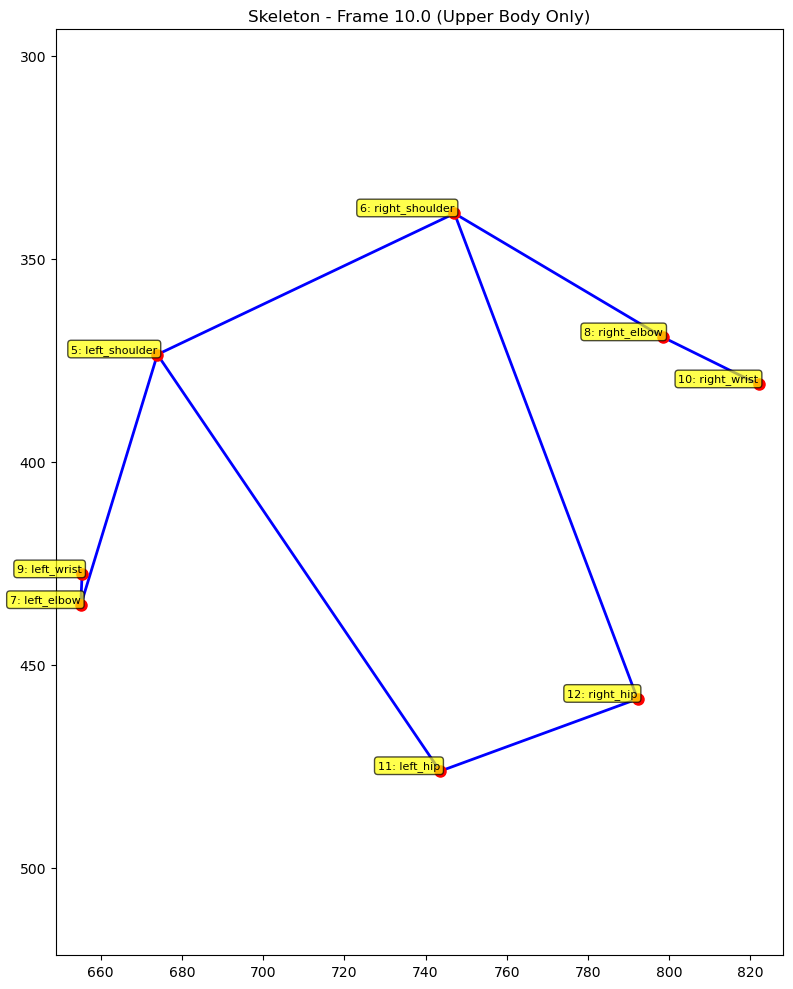

In [22]:
# Example: pick the first row of df
row = df.iloc[10]

# Define which keypoints to keep (excluding face and lower body)
keep_indices = [5, 6, 7, 8, 9, 10, 11, 12]  # shoulders, elbows, wrists, hips

# Extract keypoints (only the ones we want to keep)
keypoints = []
for i in range(17):  # kpt_0 to kpt_16
    x = row[f'kpt_{i}_x']
    y = row[f'kpt_{i}_y']
    keypoints.append((x, y))

# Keypoint labels (COCO format)
keypoint_labels = [
    'nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear',
    'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
    'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
    'left_knee', 'right_knee', 'left_ankle', 'right_ankle'
]

# Updated skeleton connections (only upper body + hips)
skeleton = [
    (5, 6),   # left_shoulder - right_shoulder
    (5, 7),   # left_shoulder - left_elbow
    (7, 9),   # left_elbow - left_wrist
    (6, 8),   # right_shoulder - right_elbow
    (8, 10),  # right_elbow - right_wrist
    (5, 11),  # left_shoulder - left_hip
    (6, 12),  # right_shoulder - right_hip
    (11, 12)  # left_hip - right_hip
]

# Plot
plt.figure(figsize=(8, 10))

# Draw skeleton connections
for a, b in skeleton:
    if keypoints[a][0] != 0 and keypoints[a][1] != 0 and keypoints[b][0] != 0 and keypoints[b][1] != 0:
        x_vals = [keypoints[a][0], keypoints[b][0]]
        y_vals = [keypoints[a][1], keypoints[b][1]]
        plt.plot(x_vals, y_vals, 'b-', linewidth=2)

# Draw keypoints with labels (only for the ones we want to keep)
for i in keep_indices:
    x, y = keypoints[i]
    if x != 0 and y != 0:
        plt.plot(x, y, 'ro', markersize=8)
        plt.text(x, y, f'{i}: {keypoint_labels[i]}', fontsize=8,
                ha='right', va='bottom', color='black',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.gca().invert_yaxis()  # Match image coordinates
plt.title(f"Skeleton - Frame {row['frame_count']} (Upper Body Only)")
plt.axis('equal')
plt.tight_layout()
plt.show()

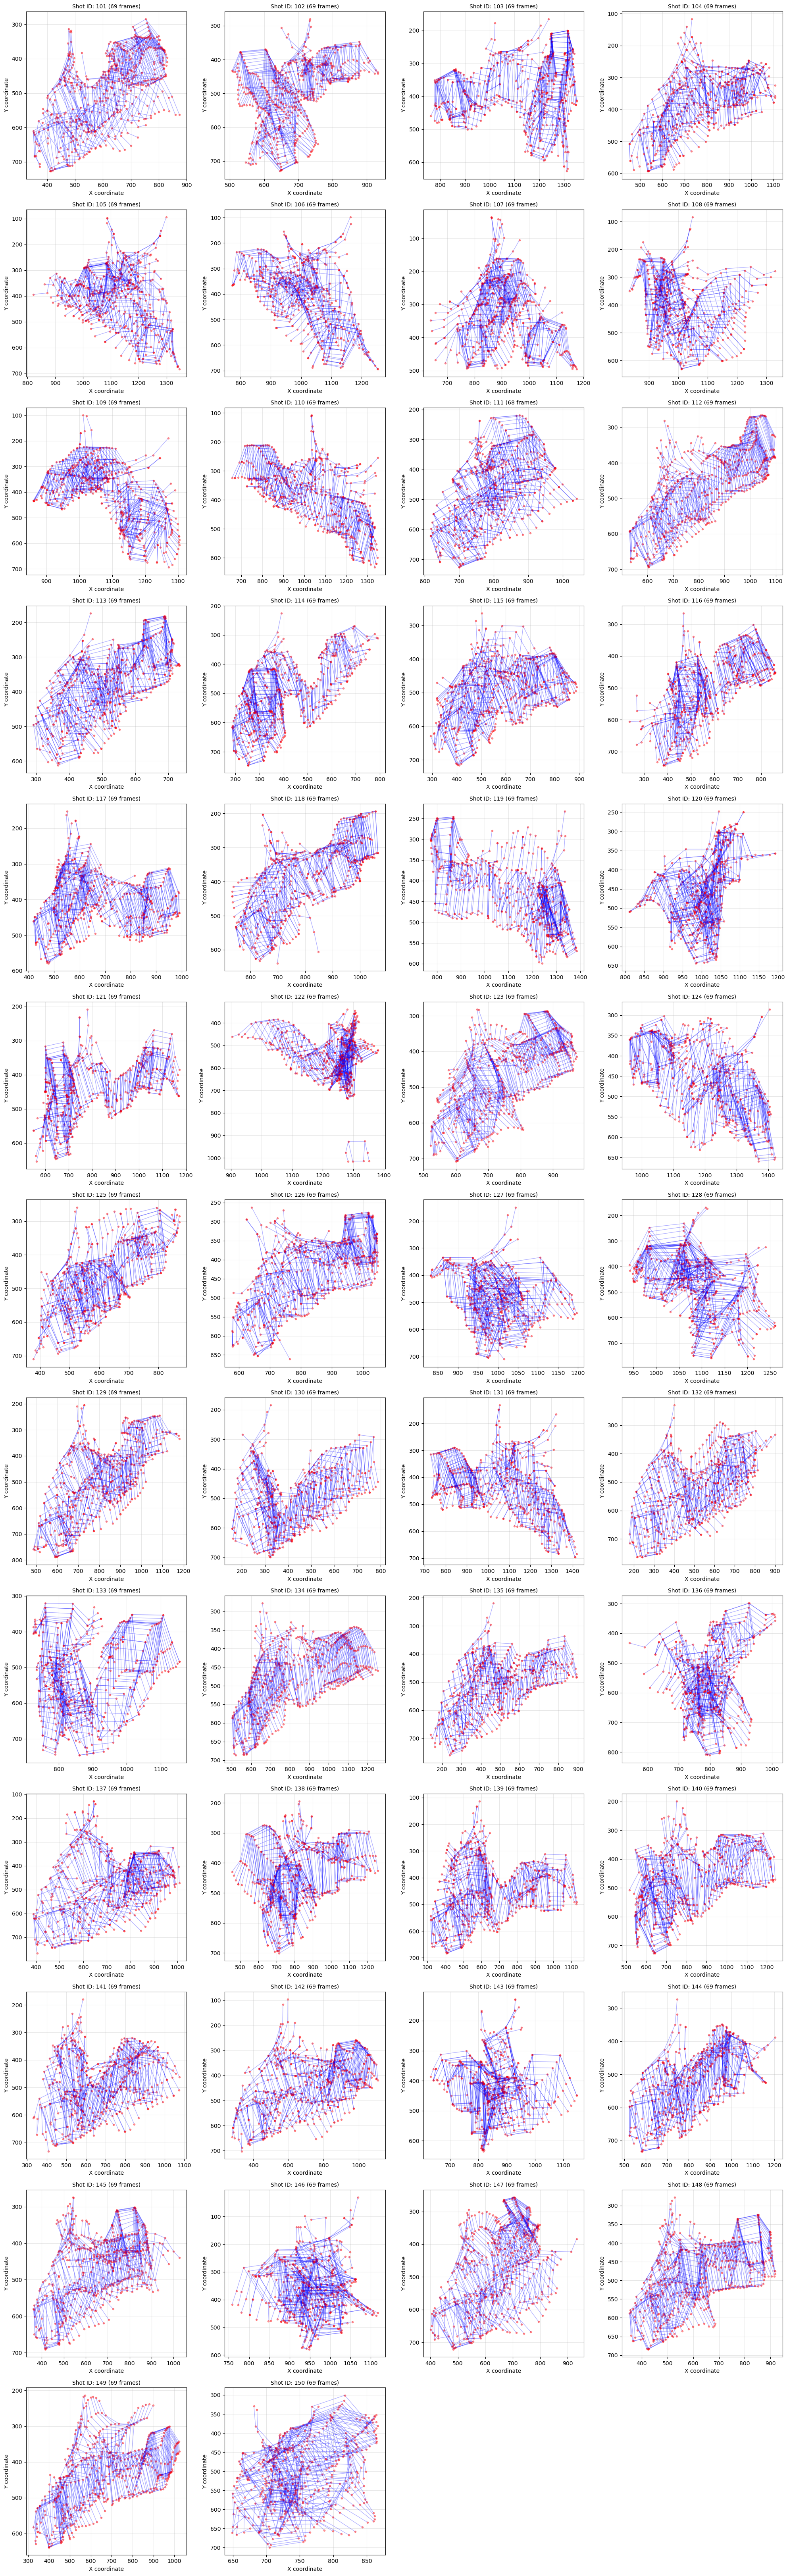

Total shots analyzed: 50


In [24]:
# Get all unique shot IDs
shot_ids = df['id'].unique()

# Create a grid of subplots
n_shots = len(shot_ids)
n_cols = 4
n_rows = int(np.ceil(n_shots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten() if n_shots > 1 else [axes]

# Skeleton connections (upper body only)
skeleton = [
    (5, 6),   # left_shoulder - right_shoulder
    (5, 7),   # left_shoulder - left_elbow
    (7, 9),   # left_elbow - left_wrist
    (6, 8),   # right_shoulder - right_elbow
    (8, 10),  # right_elbow - right_wrist
    (5, 11),  # left_shoulder - left_hip
    (6, 12),  # right_shoulder - right_hip
    (11, 12)  # left_hip - right_hip
]

# Define which keypoints to keep (upper body only)
keep_indices = [5, 6, 7, 8, 9, 10, 11, 12]  # shoulders, elbows, wrists, hips

for idx, shot_id in enumerate(shot_ids):
    ax = axes[idx]
    shot_df = df[df['id'] == shot_id].reset_index(drop=True)
    
    # Plot all frames for this shot
    for frame_idx in range(len(shot_df)):
        row = shot_df.iloc[frame_idx]
        keypoints = [(row[f'kpt_{i}_x'], row[f'kpt_{i}_y']) for i in range(17)]
        
        # Draw skeleton with transparency
        for a, b in skeleton:
            if keypoints[a][0] != 0 and keypoints[a][1] != 0 and keypoints[b][0] != 0 and keypoints[b][1] != 0:
                x_vals = [keypoints[a][0], keypoints[b][0]]
                y_vals = [keypoints[a][1], keypoints[b][1]]
                ax.plot(x_vals, y_vals, 'b-', alpha=0.3, linewidth=1)
        
        # Draw keypoints (only upper body)
        for i in keep_indices:
            x, y = keypoints[i]
            if x != 0 and y != 0:
                ax.plot(x, y, 'ro', markersize=3, alpha=0.4)
    
    ax.invert_yaxis()
    ax.set_title(f'Shot ID: {shot_id} ({len(shot_df)} frames)', fontsize=10)
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(n_shots, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('all_shots_keypoints_overview_upperbody.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Total shots analyzed: {n_shots}")

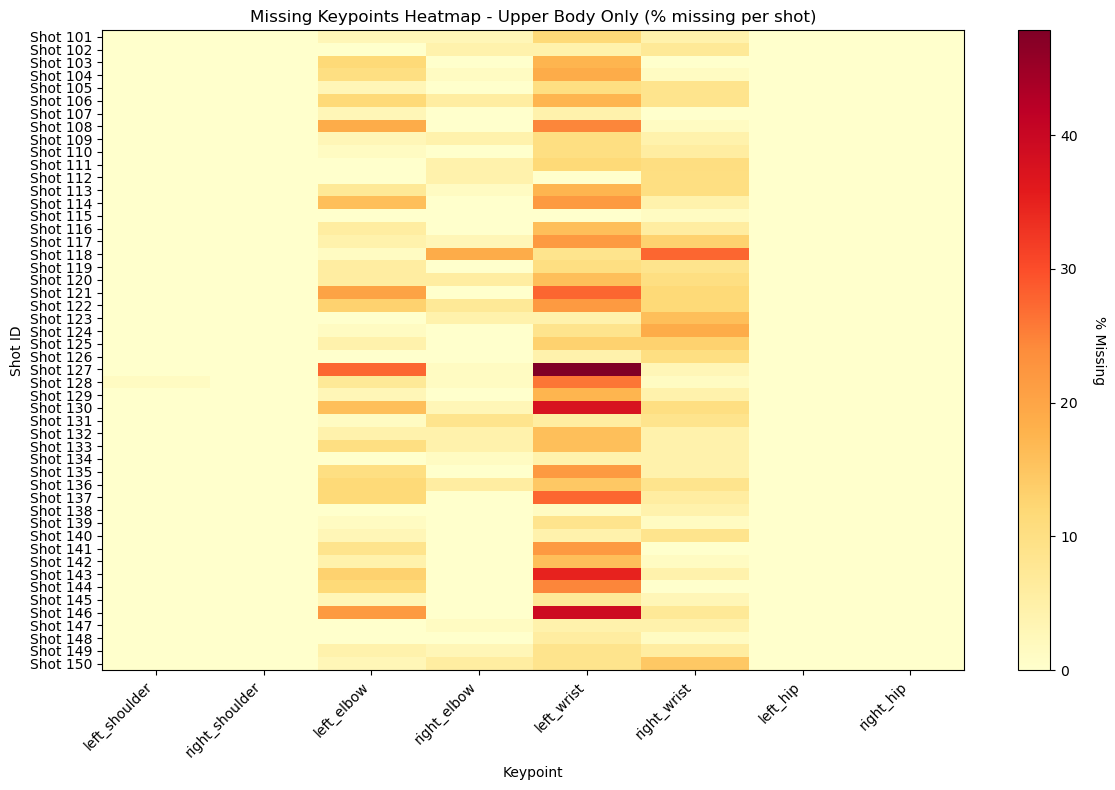

In [25]:
# Create a heatmap showing missing keypoints per shot
fig, ax = plt.subplots(figsize=(12, 8))

# Define which keypoints to keep (upper body only)
keep_indices = [5, 6, 7, 8, 9, 10, 11, 12]  # shoulders, elbows, wrists, hips

# Calculate missing percentage for each keypoint in each shot
missing_matrix = []
for shot_id in shot_ids:
    shot_df = df[df['id'] == shot_id]
    missing_row = []
    for i in keep_indices:  # Only check upper body keypoints
        x_vals = shot_df[f'kpt_{i}_x'].values
        y_vals = shot_df[f'kpt_{i}_y'].values
        missing = ((x_vals == 0) & (y_vals == 0)).sum()
        missing_pct = (missing / len(shot_df)) * 100
        missing_row.append(missing_pct)
    missing_matrix.append(missing_row)

# Keypoint labels (upper body only)
keypoint_labels = [
    'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
    'left_wrist', 'right_wrist', 'left_hip', 'right_hip'
]

im = ax.imshow(missing_matrix, cmap='YlOrRd', aspect='auto')
ax.set_xticks(range(len(keep_indices)))
ax.set_xticklabels(keypoint_labels, rotation=45, ha='right')
ax.set_yticks(range(len(shot_ids)))
ax.set_yticklabels([f'Shot {sid}' for sid in shot_ids])
ax.set_xlabel('Keypoint')
ax.set_ylabel('Shot ID')
ax.set_title('Missing Keypoints Heatmap - Upper Body Only (% missing per shot)')

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('% Missing', rotation=270, labelpad=20)

plt.tight_layout()
plt.savefig('missing_keypoints_heatmap_upperbody.png', dpi=150, bbox_inches='tight')
plt.show()

In [26]:
# Statistical analysis for outlier detection
print("=" * 80)
print("SHOT STATISTICS - Outlier Detection (Upper Body Only)")
print("=" * 80)

# Define which keypoints to keep (upper body only)
keep_indices = [5, 6, 7, 8, 9, 10, 11, 12]  # shoulders, elbows, wrists, hips

shot_stats = []

for shot_id in shot_ids:
    shot_df = df[df['id'] == shot_id]
    
    # Calculate statistics
    num_frames = len(shot_df)
    
    # Check for extreme coordinate values
    x_coords = []
    y_coords = []
    missing_count = 0
    
    for i in keep_indices:  # Only check upper body keypoints
        x_vals = shot_df[f'kpt_{i}_x'].values
        y_vals = shot_df[f'kpt_{i}_y'].values
        
        # Count missing keypoints (0,0)
        missing = ((x_vals == 0) & (y_vals == 0)).sum()
        missing_count += missing
        
        # Collect non-zero coordinates
        x_coords.extend(x_vals[x_vals != 0])
        y_coords.extend(y_vals[y_vals != 0])
    
    # Calculate spread (range of motion)
    x_range = max(x_coords) - min(x_coords) if x_coords else 0
    y_range = max(y_coords) - min(y_coords) if y_coords else 0
    
    # Missing percentage (only for upper body keypoints)
    total_keypoints = num_frames * len(keep_indices)
    missing_pct = (missing_count / total_keypoints) * 100
    
    shot_stats.append({
        'id': shot_id,
        'frames': num_frames,
        'missing_pct': missing_pct,
        'x_range': x_range,
        'y_range': y_range,
        'x_mean': np.mean(x_coords) if x_coords else 0,
        'y_mean': np.mean(y_coords) if y_coords else 0
    })
    
    print(f"Shot {shot_id:3d}: {num_frames:3d} frames | "
          f"Missing: {missing_pct:5.1f}% | "
          f"X-range: {x_range:6.1f} | Y-range: {y_range:6.1f}")

print("=" * 80)

# Identify potential outliers
import pandas as pd
stats_df = pd.DataFrame(shot_stats)

# Flag shots with issues
print("\nPOTENTIAL OUTLIERS:")
print("-" * 80)

# 1. Too few frames
min_frames_threshold = 5
few_frames = stats_df[stats_df['frames'] < min_frames_threshold]
if len(few_frames) > 0:
    print(f"\n⚠️  Shots with fewer than {min_frames_threshold} frames:")
    print(few_frames[['id', 'frames']].to_string(index=False))

# 2. High missing keypoints
high_missing_threshold = 30  # 30% missing
high_missing = stats_df[stats_df['missing_pct'] > high_missing_threshold]
if len(high_missing) > 0:
    print(f"\n⚠️  Shots with >{high_missing_threshold}% missing keypoints:")
    print(high_missing[['id', 'frames', 'missing_pct']].to_string(index=False))

# 3. Unusual ranges (potential tracking errors)
x_range_mean = stats_df['x_range'].mean()
x_range_std = stats_df['x_range'].std()
y_range_mean = stats_df['y_range'].mean()
y_range_std = stats_df['y_range'].std()

unusual_range = stats_df[
    (stats_df['x_range'] > x_range_mean + 2*x_range_std) |
    (stats_df['y_range'] > y_range_mean + 2*y_range_std) |
    (stats_df['x_range'] < x_range_mean - 2*x_range_std) |
    (stats_df['y_range'] < y_range_mean - 2*y_range_std)
]
if len(unusual_range) > 0:
    print(f"\n⚠️  Shots with unusual coordinate ranges (>2 std dev):")
    print(unusual_range[['id', 'frames', 'x_range', 'y_range']].to_string(index=False))

print("\n" + "=" * 80)
print(f"Summary: {len(shot_ids)} total shots analyzed")
print(f"Average frames per shot: {stats_df['frames'].mean():.1f}")
print(f"Average missing keypoints (upper body): {stats_df['missing_pct'].mean():.1f}%")
print(f"Keypoints tracked: {len(keep_indices)} (shoulders, elbows, wrists, hips)")
print("=" * 80)

SHOT STATISTICS - Outlier Detection (Upper Body Only)
Shot 101:  69 frames | Missing:   2.7% | X-range:  523.2 | Y-range:  442.3
Shot 102:  69 frames | Missing:   2.0% | X-range:  426.2 | Y-range:  449.2
Shot 103:  69 frames | Missing:   3.6% | X-range:  589.6 | Y-range:  461.4
Shot 104:  69 frames | Missing:   4.0% | X-range:  659.1 | Y-range:  476.0
Shot 105:  69 frames | Missing:   2.7% | X-range:  524.6 | Y-range:  588.9
Shot 106:  69 frames | Missing:   5.4% | X-range:  481.2 | Y-range:  596.2
Shot 107:  69 frames | Missing:   0.9% | X-range:  535.1 | Y-range:  459.4
Shot 108:  69 frames | Missing:   5.6% | X-range:  496.6 | Y-range:  547.4
Shot 109:  69 frames | Missing:   2.7% | X-range:  443.3 | Y-range:  593.3
Shot 110:  69 frames | Missing:   2.2% | X-range:  696.6 | Y-range:  524.2
Shot 111:  68 frames | Missing:   3.3% | X-range:  423.2 | Y-range:  507.1
Shot 112:  69 frames | Missing:   1.8% | X-range:  568.6 | Y-range:  428.6
Shot 113:  69 frames | Missing:   4.5% | X-ran